# Homework 1: Computing π
**Gabriel M Steward**

**Dec 2021**

**This is a coding assignment.**

*The basic instructions/rules that must be followed for both coding and non-coding homework assignments may be found in the Syllabus.*

*This assignment is designed to familiarize you with some of the basic programming practices we will encounter in this course, including algorithms and analysis of error convergence to zero. We will explore these practices in the context of a very fun and very ancient problem: computing π (i.e., the ratio of the circumference of a circle to its diameter).*

*A number of algorithms exist for computing π, and this assignment will familiarize you with some of the basic approaches. First a couple of important points:*

* *You will be expected to use double-precision (IEEE-754 standard) arithmetic to complete this assignment. Most programming languages these days support this standard, including but not limited to: Python, C, C++, Java, Matlab, and FORTRAN.* **It is up to you to know how to use double-precision arithmetic in your chosen language; the basics of computer programming are not taught in this class**.
* *For the purpose of this assignment, we will define the “exact” value of π to be the following:* **π = 3.14159265358979323846264338327950288**, *which is consistent with the exact value to more than twenty significant digits – far better than double precision will give us.*

*For each of the following algorithms, you are to*

* *Write **by yourself, from scratch** a computer program that implements the given algorithm.*
* *Using the plotting program of your choice, create a plot of the logarithmic relative error between the value of π your algorithm computes (i.e, the approximate value, A) and the “exact” value E given above, versus iteration I, where the set of I will be given for each algorithm. As always be sure to carefully number and label your axes; see the Syllabus for more details. Your plot will be graded according to the correctness of the result and how well you followed the directions in the Syllabus and in this assignment for creating plots.*

***Logarithmic Relative Error***

$$log_{10}E_{rel}=log_{10}\left ( \left | \frac{E-A}{A} \right | \right )$$

## Problem 1 (10 pts)

"*Arctangent algorithm #1 ": The Gregory-Leibniz series*
$$π=lim_{I\rightarrow ∞} 4\sum_{n=0}^{I}\frac{(-1)^n}{2n+1}$$
*For the plot, use* $I\in \left \{ 100, 10^5, 2\times10^5, 3\times10^5, 4\times10^5,...,9\times10^5,10^6  \right \}$

First of all, we note that float values in python are already double-precision, so we do not need to declare anything special. However, we do need to make certain that all math steps are performed in double-precision, so we must watch for stray int variables. 

There is not much else to do aside from program the implementation.

In [1]:
n = 0.0
total = 0.0
#decimal points added to ensure double precision in all calculations.
#note that I, while important, does not need to be defined. 

while n <= 1e6: #Stop at max I
    total = total+(4.0*((-1.0)**n)/(2.0*n+1.0)) #add 1 sum term every iteration
    if n == 100 or n%1e5==0: #only print on the I values we want. 
        print(total, end =" ")
        print(n) #This actually prints I=0 too!
    n = n+1

4.0 0.0
3.1514934010709914 100.0
3.1416026534897203 100000.0
3.141597653564762 200000.0
3.14159598691202 300000.0
3.141595153583494 400000.0
3.1415946535856922 500000.0
3.1415943202535703 600000.0
3.1415940821590773 700000.0
3.141593903588155 800000.0
3.1415937646996386 900000.0
3.1415936535887745 1000000.0


We note that this is a very slowly converging sequence since we need 10,000 terms to even get 3.14. Not very efficient, but it was easy to program. 

We now turn to the logarithmic plot. We first of all make a funciton that can return logarithmic relative error. 

In [16]:
from math import log
pi = 3.14159265358979323846264338327950288
#The "true" value of pi. 
#Python floats do not store this many digits.
#This will only become an issue if we start getting answers precise 
#to somewhere around 15 decimal places. 

def logError(value,truth):
    return log(abs((value-truth)/(value)),10)

print(logError(4.0,pi))
print(logError(3.1514934010709914,pi))
print(logError(3.1416026534897203,pi))
print(logError(3.141597653564762,pi))
print(logError(3.14159598691202,pi))
print(logError(3.141595153583494,pi))
print(logError(3.1415946535856922,pi))
print(logError(3.1415943202535703,pi))
print(logError(3.1415940821590773,pi))
print(logError(3.141593903588155,pi))
print(logError(3.1415937646996386,pi))
print(logError(3.1415936535887745,pi))
#for reference...
print(logError(pi-1e-15,pi))
#is the logarithmic relative error near where our precision gives out. 

-0.6683665655809692
-2.502848418129321
-5.497155601207444
-5.7981827337498295
-5.974273035282135
-6.0992113038811375
-6.196121044006575
-6.275302106403102
-6.342248762096386
-6.400240601687558
-6.4513930304309355
-6.49715045330716
-15.548649655893193


We note that we are nowhere near the value at the "edge of precision" so we do not need to concern ourselves with potential machine errors at the extremes (at least not for this problem). However, we do need a *plot*. 

Fair warning, as this is the first time we've used matplotlib, this may be a little messy. 

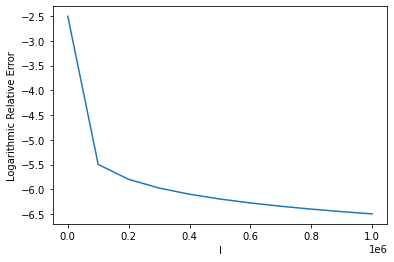

In [3]:
from matplotlib import pyplot
fig, ax = pyplot.subplots()  # Create a figure containing a single axes.
ax.set_xlabel("I")
ax.set_ylabel("Logarithmic Relative Error")
ax.plot([100,1e5,2e5,3e5,4e5,5e5,6e5,7e5,8e5,9e5,1e6], 
[-2.502848418129321, #we cut out the first number as it was I=0
-5.497155601207444,
-5.7981827337498295,
-5.974273035282135,
-6.0992113038811375,
-6.196121044006575,
-6.275302106403102,
-6.342248762096386,
-6.400240601687558,
-6.4513930304309355,
-6.49715045330716
]);  # Plot some data on the axes.

And with that we have done as the problem requested. We have obtained our graph of the logarithmic relative error for the Gregory-Leibniz series. Given the extremely large numbers given to I, very clearly this is inneficient for finding π and is useful in that regard only as a novelty. 

## Problem 2 (20 pts)
"*Arctangent algorithm #2*":
$$π=lim_{I\rightarrow ∞} 2\sum_{n=0}^{I}\frac{n!}{(2n+1)!!}$$
*where the double factorial is defined n!! = (n)(n−2)(n−4)(...)(2) for n even, or n!! = (n)(n−2)(n−4)(...)(1) for n odd. Also, 0!! = 1!! = 1. In solving this problem, you must – by yourself – write functions capable of computing single and double factorials. These functions may not use any built-in single or double factorial functions in your language.*

*For the plot, use $I\in \left \{ 1,3,5,7,9,...,31  \right \}$*

The code for running this will be largely identical to the one for **Problem 1** as it is also a sum. However, we need to NOT use the pre-prepared functions for factorials and rather need to create our own. As it is just repeated multiplication our concern is mainly in creating an overflow. Therefore, when we create our functions, we'll test if it can even compute a double factorial of 2(31)+1. 

We realize that n!! is not equal to (n!)! even if it looks like it would make sense, the definition given is decidedly not that. 

We do note that all our I values are odd. However, our n can take any value up to I, so this does not help us simplify our double factorial function.

Once the funcitons are defined we then run through the basic summing. 

In [14]:
def factorial(num):
    total = 1.0
    if num < 0:
        print("Factorial Negative Number Error!")
        return 0
    while num > 0: #stop facorializing once we hit zero. 
        total = total*num
        num = num-1
    return total
print(factorial(31))
#fun fact: this has built in 0! handling. It returns 1.
print(factorial(0))

def doubleFactorial(num):
    total = 1.0
    if num < 0:
        print("Double Factorial Negative Number Error!")
        return 0
    while num > 0: #stop facorializing once we hit zero. 
        total = total*num
        num = num-2
#an obvoius quesiton is "why no checking for even/oddness?"
#because it doesn't matter. The num>0 check will ensure the last number
#multiplied is 1 or 2 depending on the evenness or oddness of n. 
    return total

print(doubleFactorial(2*31+1))
print("And now we do the sums.")

n = 0.0
sumTotal = 0.0
#decimal points added to ensure double precision in all calculations.
#note that I, while important, does not need to be defined. 

while n <= 31: #Stop at max I
    sumTotal = sumTotal+(2.0*((factorial(n))/doubleFactorial(2*n+1))) #add 1 sum term every iteration
    # print(factorial(n), end =" ")
    # print(doubleFactorial(2*n+1))
    
    if n%2==1: #only print on the I values we want. (Odd ones)
        print(sumTotal, end =" ")
        print(n)
    n = n+1

8.222838654177924e+33
1.0
1.122755752855714e+44
And now we do the sums.
2.6666666666666665 1.0
3.0476190476190474 3.0
3.121500721500721 5.0
3.1371295371295367 7.0
3.140578169680336 9.0
3.1413584725201353 11.0
3.1415379931734746 13.0
3.1415797881375944 15.0
3.141589605588229 17.0
3.1415919276751456 19.0
3.141592479958223 21.0
3.1415926119088344 23.0
3.1415926435534467 25.0
3.14159265116678 27.0
3.1415926530034817 29.0
3.141592653447635 31.0


This converges much, much faster than the previous one. 

We now turn to the logarithmic plot. Similar to the above. We will plot it afterward. 

In [5]:
from math import log
pi = 3.14159265358979323846264338327950288
#The "true" value of pi. 
#Python floats do not store this many digits.
#This will only become an issue if we start getting answers precise 
#to somewhere around 15 decimal places. 

def logError(value,truth):
    return log(abs((value-truth)/(value)),10)

print(logError(2.6666666666666665,pi))
print(logError(3.0476190476190474,pi))
print(logError(3.121500721500721,pi))
print(logError(3.1371295371295367,pi))
print(logError(3.140578169680336,pi))
print(logError(3.1413584725201353,pi))
print(logError(3.1415379931734746,pi))
print(logError(3.1415797881375944,pi))
print(logError(3.141589605588229,pi))
print(logError(3.1415919276751456,pi))
print(logError(3.141592479958223,pi))
print(logError(3.1415926119088344,pi))
print(logError(3.1415926435534467,pi))
print(logError(3.14159265116678,pi))
print(logError(3.1415926530034817,pi))
print(logError(3.141592653447635,pi))
#for reference...
print(logError(pi-1e-15,pi))
#is the logarithmic relative error near where our precision gives out. 

-0.7493427983850663
-1.5109547872552134
-2.191341738079361
-2.846894232347417
-3.4907644444006793
-4.127565712867478
-4.759469381207065
-5.387723038642703
-6.013134265818766
-6.636264212659039
-7.2575211564514825
-7.877212167518704
-8.495574228034315
-9.112794145796776
-9.729021501628052
-10.344377696743281
-15.548649655893193


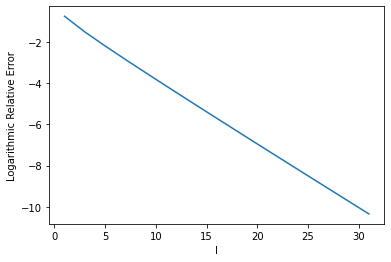

In [6]:
from matplotlib import pyplot
fig, ax = pyplot.subplots()  # Create a figure containing a single axes.
ax.set_xlabel("I")
ax.set_ylabel("Logarithmic Relative Error")
ax.plot([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31], 
[-0.7493427983850663,
-1.5109547872552134,
-2.191341738079361,
-2.846894232347417,
-3.4907644444006793,
-4.127565712867478,
-4.759469381207065,
-5.387723038642703,
-6.013134265818766,
-6.636264212659039,
-7.2575211564514825,
-7.877212167518704,
-8.495574228034315,
-9.112794145796776,
-9.729021501628052,
-10.344377696743281
]);  # Plot some data on the axes.

And **Problem 2** is done. 

Of particular noteworthiness is how the logarithmic relative error is almost if not completely linear in accuracy, as opposed to the exponential decline seen in **Problem 1**. This assures us that we will continue to get more precise (in a logarithmic sense) at a gradual rate for this method. Which is to say it is a much better method than the previous. 

## Problem 3 (40 pts)
*Borwein's algorithm, cubic convergence: first set*
$$a_0=\frac{1}{3}$$
$$s_0=\frac{\sqrt{3}-1}{2}$$
*Upon defining $r_n$ in terms of $s_{n−1}$, subsequent values of $a_n$ and $s_n$ are given by*
$$r_{n+1}=\frac{3}{1+2(1-s_{n}^{3})^{1/3}}$$
$$s_{n+1}=\frac{r_{n+1}-1}{2}$$
$$a_{n+1}=r_{n+1}^{2}a_n-3^n\left ( r_{n+1}^{2}-1 \right )$$
*and*
$$π=\lim_{I\rightarrow ∞}\frac{1}{a_I}$$
*For this plot, use $I\in \left \{ 1,2,3,4  \right \}$*

This method is not so much a series as an iterative sequence of steps. Luckily we only need to do it four times. 

We rather quickly run into a compounding error issue: we have a lot of *very close values* being subtracted from one another, especially in the definition for s, as $r_{n+1}$ approahces 1. Observe the direct implementation:

In [5]:
n=0.0
a=1.0/3.0
s=(3.0**(0.5)-1.0)/2.0
r=0.0 #placeholder as there is no r_0. 
aNew=a
sNew=s
rNew=r

print(1.0/aNew, end =" ") #Initial "I=0" guess.
print(n)

n=n+1
while n < 5:
    #evaluation of iterative parts given above
    rNew=3.0/(1.0+(2.0*((1.0-(s**3.0))**(1.0/3.0))))
    sNew=(rNew-1.0)/2.0
    aNew=((rNew**2.0)*a)-((3.0**(n-1))*((rNew**2.0)-1.0)) 
    print(1.0/aNew, end =" ")
    print(n)
    #adjust for next cycle
    n=n+1
    a=aNew
    s=sNew
    r=rNew

3.0 0.0
3.1415905852058974 1.0
3.141592653589804 2.0
3.141592653589804 3.0
3.141592653589804 4.0


Note that the number seems to "lock" at iteration 2 with many incorrect digits. 

The next step is to minimize this subtraction error. The issue is there are three of them, one each in the definitions of r, s, and a. This is easiest to remove in a:
$$a_{n+1}=r_{n+1}^{2}(a_n-3^{n})+3^n$$
For s, we can declare it in terms of itself.
$$s_{n+1}=\frac{1-(1-s_{n}^{3})^{1/3}}{1+2(1-s_{n}^{3})^{1/3}}$$
This still has two bad subtractions, though—the one in the numerator, and the one involving $s_n$. The numerator can be solved through the familiar *radicalization* procedure. 
$$s_{n+1}=\frac{s_{n}^{3}}{(1+2(1-s_{n}^{3})^{1/3})(1+(1-s_{n}^{3})^{1/3}+(1-s_{n}^{3})^{2/3})}$$
Now we're actually only at one annoying subtraction. It just happens to be repeated over and over and over. If we multiply it, though, we get the following:
$$s_{n+1}=\frac{s_{n}^{3}}{(3+3(1-s_{n}^{3})^{1/3}+3(1-s_{n}^{3})^{2/3}-2s_{n}^{3})}$$
This is not *ideal* as many of the subtractions are still there. It is time for us to examine how quickly s is geting smaller. If we assume s << 1 (which it gets to rather quickly) the above expresison becomes $s_{n}^{3}/9$ which we can use to examine the order of magnitude. Starting with a 1e-1 (the magnitude of our $s_0$) we get the following orders of magnitude in result as n increases: 

0: 1e-1

1: 1e-4

2: 1e-13

3: 1e-40

Already we are beyond double precision (which will give us about 1e-15). This means that by the third iteration the value of s is so small the computer won't even detect a change due to the subtraction (or addition!). And this is just s itself—it says nothing about $s^3$. However, due to the way we arranged the above equation, we can still get reasonable values for s itself. So we may still have enough.

Oh, and as for r, we can now just define it in terms of s. 
$$r_{n+1}=2s_{n+1}+1$$
Which has no subtractions. That said, once we get to $s_3$ we have the problem of r's value not being noticably different at all. So, what if we tried to consider r as two variables: "1" and "the additive term."
$$a_{n+1}=(2s_{n+1}+1)^{2}(a_n-3^{n})+3^n$$
$$a_{n+1}=4s_{n+1}^{2}a_n+4s_{n+1}a_n+a_n-4s_{n+1}^{2}3^n-4s_{n+1}3^n$$
The error remains at this point, but it is much more manageable.

With all this, we implement a refined minimized-error algorithm

In [8]:
n=0.0
a=1.0/3.0
s=(3.0**(0.5)-1.0)/2.0
r=0.0 #placeholder as there is no r_0. 
aNew=a
sNew=s
rNew=r

print(1.0/aNew, end =" ") #Initial "I=0" guess.
print(n)

n=n+1.0
while n < 5:
    #evaluation of iterative parts given above
    temp=(1.0-s**3.0)**(1.0/3.0) #useful to keep from typing this all over.
    sNew=(s**3.0)/(3.0+3.0*temp+3.0*temp*temp-2.0*(s**3.0))
    #the "temp" values might as well be one in most cases, though. 
    rNew=(2.0*sNew)+1.0
    aNew=((4.0*(sNew**2.0)*a)+((4.0*sNew)*a)+a-(4.0*(sNew**2.0))*(3**(n-1))-((4.0*sNew)*(3**(n-1)))) 
    print(1.0/aNew, end =" ")
    print(n)
    #adjust for next cycle
    n=n+1
    a=aNew
    s=sNew
    r=rNew

3.0 0.0
3.1415905852058965 1.0
3.1415926535897936 2.0
3.1415926535897936 3.0
3.1415926535897936 4.0


Which is great, we get the reasonable maximum SIXTEEN sig figs here. (The tailing digit should be a 2, not a 6, but we really shouldn't expect that last one to be right.) 

Note that the cubic convergence is cubic upon 1/π. This means we can get to π *really* fast. As demonstrated above. 

We now do the same graphing procedures as we did for the last two problems. 

In [9]:
from math import log
pi = 3.14159265358979323846264338327950288
#The "true" value of pi. 
#Python floats do not store this many digits.
#This will only become an issue if we start getting answers precise 
#to somewhere around 15 decimal places. 

def logError(value,truth):
    return log(abs((value-truth)/(value)),10)

print(logError(3.0,pi))
print(logError(3.1415905852058965,pi))
print(logError(3.1415926535897936,pi))
print(logError(3.1415926535897936,pi))
print(logError(3.1415926535897936,pi))
#for reference...
print(logError(pi-1e-15,pi))
#is the logarithmic relative error near where our precision gives out. 

-1.3260805337683237
-6.18151843884547
-15.849679651557175
-15.849679651557175
-15.849679651557175
-15.548649655893193


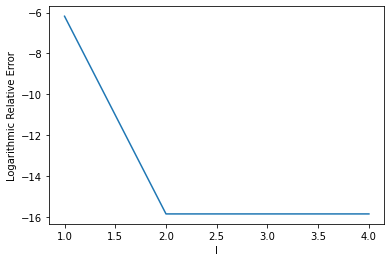

In [10]:
from matplotlib import pyplot
fig, ax = pyplot.subplots()  # Create a figure containing a single axes.
ax.set_xlabel("I")
ax.set_ylabel("Logarithmic Relative Error")
ax.plot([1,2,3,4], 
[-6.18151843884547,
-15.849679651557175,
-15.849679651557175,
-15.849679651557175
]);  # Plot some data on the axes.

There's not as much to show here. We reach the maximum precision available to double data types in just two iterations, and then we don't change whatsoever. If it wasn't such a hassle to present it in such a way to minimize subtraction error, it would have clearly been the best. 

## Problem 4 (20 pts)
*Comment on the rate of convergence for each algorithm relative to the other algorithms: which algorithm exhibits the fastest convergence to the “exact” value of π as I increases? At most, to how many significant digits were you able to compute π using the given algorithms and given I values?*

Fastest convergence: obviously the last one. It hits the maximum possible accuracy after two steps. It is rather complicated to program, but highly precise even with the single remaining subtraction error. 

The second algorithm is the second-best: it has a very linear approach to the value. Keep doing more iterations and you'll get beter values. It'll eventually reach maximum precision. (Investigation proves this not to be true, as the second algorithm does not get the sixteenth sig fig correct, likely due to how it was implemented and compounted. It hits this maximum accuracy at step 49)

The third algorithm is slow. But its graph doesn't do justice to how slow it is. Remember, I is the number of iterations. It's already been a *hundred* iterations by the time we see the first result, and the more steps we go the slower we get more sig figs! It should not be used for calculating π at all. Use one of the other two depending on your need. 

Significant Digits reached at each I value are below. 
Note that this assumes no rounding and just reading off the numbers. Chosen since the problem asks for "At most" which means we give the numbers the bennefit of the doubt in every possible way—what the number appears to be, it is.

**Problem 1**

100: 2 digits

1e5: 3 

2e5: 6

3e5: 6

...

9e5: 6

1e6: 6


Basically it just stops getting better. 

**Problem 2**

1: 0 digits

3: 1 

5: 2

7: 2

9: 3

11: 4

13: 5

15: 5

17: 5

19: 6

21: 7

23: 8

25: 8

27: 9

29: 10

31: 10

The rate of increase is *roughly* linear, with an increase of one digit at a time every step or so. It is naturally expected to fluctuate a bit, but continue to grow in more or less the same way. If we did 10,000 iteraions as we did in **Problem 1** this would get us very far. 

**Problem 3**

1: 6 digits

2: 16

3: 16

4: 16

Essentially we have an algorithm that gets "stuck" at a not very accurate value and is relatively useless for anything with high precision, a linear algorithm that continually adds more digits of precision, and then the algorithm that jumps almost immediately to the limit of double precision. Clearly the third algorithm could be used for much higher precision work, if someone was willing to put in the effort to simplify it. (Or just use what we made above.) 